In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END

In [2]:
class Agentstate(TypedDict):
    number1:int
    operator:str
    number2:int
    finalnumber:int

In [3]:
def adder(state:Agentstate):
    """this is the adding of two number"""
    state['finalnumber'] = state['number1'] + state['number2']
    return state

def subtractor(state:Agentstate):
    """this is for subtract the 2 number."""
    state['finalnumber'] = state['number2'] - state['number1']
    return state

def decide_next_node(state:Agentstate):
    """this is the state which are decide the which phase of the graph is working."""
    if state['operator'] == "+":
        return "addition_operator"
    elif state['operator'] == "-":
        return "substraction_operator"



In [9]:
graph = StateGraph(Agentstate)
graph.add_node("adder_node",adder)
graph.add_node("subtractor_node",subtractor)

graph.add_node("router", lambda state:state) # passthrough function
graph.add_edge(START,"router")
graph.add_conditional_edges(
"router",
decide_next_node,
{
    #edges: Node
    "addition_operator":"adder_node",
    "substraction_operator":"subtractor_node"
}

)
graph.add_edge("adder_node",END)
graph.add_edge("subtractor_node",END)

app = graph.compile()



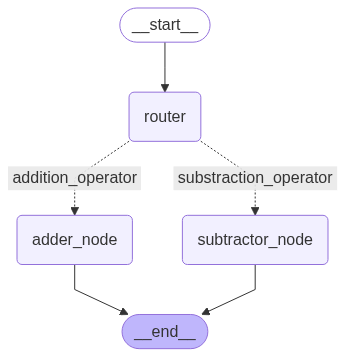

In [10]:
app

In [11]:
app.invoke({'number1':15,'number2':5,'operator':'+'})

{'number1': 15, 'operator': '+', 'number2': 5, 'finalnumber': 20}

In [12]:
app.invoke({'number1':12,'number2':32,'operator':'-'})

{'number1': 12, 'operator': '-', 'number2': 32, 'finalnumber': 20}

In [13]:
initial_stage = Agentstate(number1=12,number2=10,operator='+')
app.invoke(initial_stage)

{'number1': 12, 'operator': '+', 'number2': 10, 'finalnumber': 22}